In [118]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns
sns.set_style('darkgrid')

/kaggle/input/netflix-original-films-imdb-scores/NetflixOriginals.csv


In [2]:
# Importing the dataset
netflix = pd.read_csv('/kaggle/input/netflix-original-films-imdb-scores/NetflixOriginals.csv', encoding='cp1252')
netflix

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


In [3]:
# Checking the info 
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [4]:
# Checking the shape 
netflix.shape

(584, 6)

In [5]:
# Looking for nulls 
netflix.isnull().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

In [6]:
# Reviewing the columns
netflix.columns

Index(['Title', 'Genre', 'Premiere', 'Runtime', 'IMDB Score', 'Language'], dtype='object')

In [7]:
# Describing the data
netflix.describe()

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


In [8]:
# describe the object dtype columns
netflix.select_dtypes(include='object').describe() # Premiere contains date but the dtype is object 

,Title,Genre,Premiere,Language
count,584,584,584,584
unique,584,115,390,38
top,Enter the Anime,Documentary,"October 2, 2020",English
freq,1,159,6,401


In [9]:
# Changing the Premiere column dtype from object to datetime
netflix['Premiere'] = pd.to_datetime(netflix['Premiere'].str.replace('.', ',', regex=False), format='%B %d, %Y').dt.strftime('%d-%m-%Y')

In [10]:
netflix['Premiere'] = pd.to_datetime(netflix['Premiere'], format='%d-%m-%Y')

In [11]:
netflix['Premiere'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 584 entries, 0 to 583
Series name: Premiere
Non-Null Count  Dtype         
--------------  -----         
584 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 4.7 KB


In [12]:
netflix

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian
3,The Open House,Horror thriller,2018-01-19,94,3.2,English
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese


In [13]:
# Split the 'Genre' column into two separate columns
netflix[['Primary_Genre', 'Genre2', 'Genre3', 'Genre4']] = netflix['Genre'].str.split('/', expand=True)
#We need to create columns corresponding to the values separated by '/'. For instance, if we have values like 'science/fiction/comedy/action', we'll create four columns to accommodate each separated value accordingly.

In [14]:
netflix

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Primary_Genre,Genre2,Genre3,Genre4
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,Documentary,None,None,None
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,Thriller,None,None,None
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,Science fiction,Drama,None,None
3,The Open House,Horror thriller,2018-01-19,94,3.2,English,Horror thriller,None,None,None
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,Mystery,None,None,None
...,...,...,...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English,Concert Film,None,None,None
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian,Documentary,None,None,None
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English,One-man show,None,None,None
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese,Documentary,None,None,None


In [15]:
# Split the 'Language' column into two separate columns
netflix[['Primary_Language', 'Language2', 'Language3']] = netflix['Language'].str.split('/', expand=True)

In [16]:
netflix

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Primary_Genre,Genre2,Genre3,Genre4,Primary_Language,Language2,Language3
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,Documentary,None,None,None,English,Japanese,None
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,Thriller,None,None,None,Spanish,None,None
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,Science fiction,Drama,None,None,Italian,None,None
3,The Open House,Horror thriller,2018-01-19,94,3.2,English,Horror thriller,None,None,None,English,None,None
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,Mystery,None,None,None,Hindi,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English,Concert Film,None,None,None,English,None,None
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian,Documentary,None,None,None,English,Ukranian,Russian
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English,One-man show,None,None,None,English,None,None
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese,Documentary,None,None,None,Portuguese,None,None


In [17]:
# Dropping the unnecessary columns, using the Primary_Genre and Primary_Language for analysis
netflix.drop(['Genre2', 'Genre3', 'Genre4', 'Language2', 'Language3'], axis=1, inplace=True)

In [18]:
netflix

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Primary_Genre,Primary_Language
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,Documentary,English
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,Thriller,Spanish
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,Science fiction,Italian
3,The Open House,Horror thriller,2018-01-19,94,3.2,English,Horror thriller,English
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,Mystery,Hindi
...,...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English,Concert Film,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian,Documentary,English
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English,One-man show,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese,Documentary,Portuguese


# What is the average IMDB score for each genre?

In [19]:
netflix.groupby('Primary_Genre')['IMDB Score'].mean().sort_values(ascending=False).round(decimals=1)

Primary_Genre
Musical               7.7
Concert Film          7.6
Anthology             7.6
Making-of             7.4
Action-adventure      7.3
                     ... 
Romance drama         4.6
Superhero-Comedy      4.4
Political thriller    4.3
Horror anthology      4.3
Heist film            3.7
Name: IMDB Score, Length: 91, dtype: float64

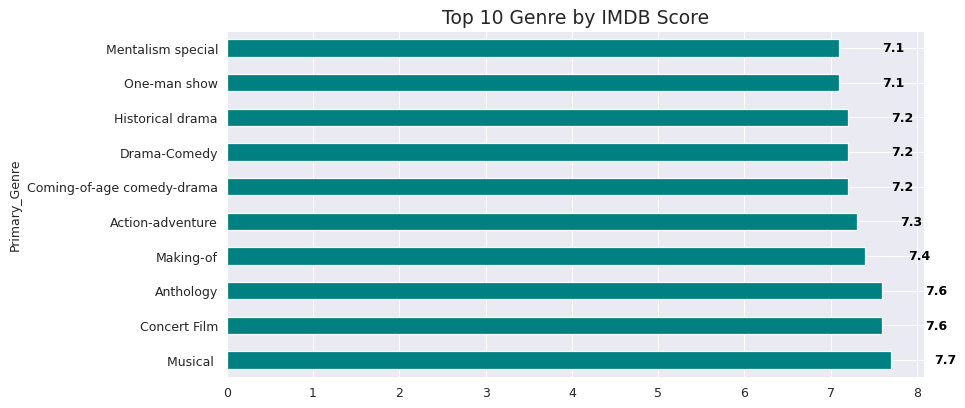

In [20]:
# Plotting the above results
# I'm taking the top 10 genre's for plotting
imdb = netflix.groupby('Primary_Genre')['IMDB Score'].mean().sort_values(ascending=False).round(decimals=1).head(10)
plt.figure(figsize=(10,5),dpi=90, frameon=True)

for i, v in enumerate(imdb.values):
    plt.text(x=v+0.5, y=i, s=str(v), fontsize=10, color='black', fontweight='bold', va='center')
    
plt.ylabel('Primary_Genre')
plt.xlabel('IMDB Score')
plt.title('Top 10 Genre by IMDB Score', size=15)

imdb.plot.barh(color='teal')
plt.show()

# Which genre has the highest average runtime?

In [21]:
netflix.groupby('Primary_Genre')['Runtime'].mean().sort_values(ascending=False).round()

Primary_Genre
Anthology           149.0
Heist film          149.0
Zombie              148.0
War drama           146.0
Horror anthology    144.0
                    ...  
Animation            29.0
Aftershow            24.0
Drama                17.0
Musical              15.0
Anime                 4.0
Name: Runtime, Length: 91, dtype: float64

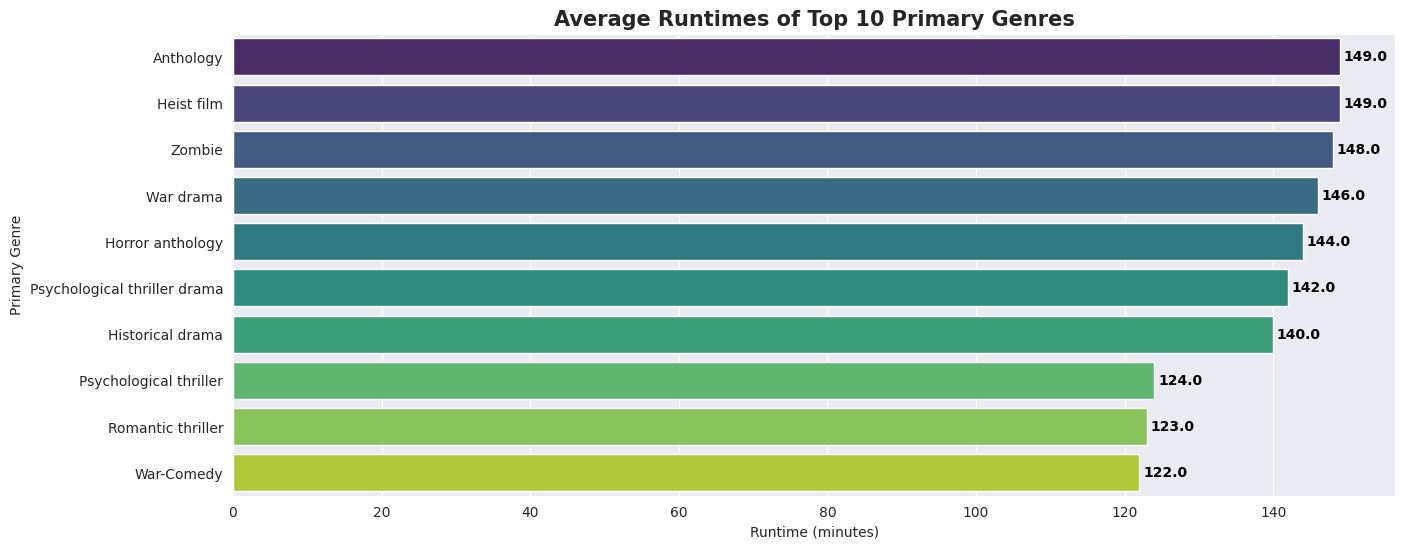

In [94]:
avg_run = netflix.groupby('Primary_Genre')['Runtime'].mean().sort_values(ascending=False).round().head(10)
plt.figure(figsize=(15, 6))
sns.barplot(x=avg_run.values, y=avg_run.index, orient='h', palette='viridis')
for i, v in enumerate(avg_run.values):
    plt.text(x=v+0.5, y=i, s=str(v), fontsize=10, color='black', fontweight='bold', va='center')
plt.title('Average Runtimes of Top 10 Primary Genres', fontsize=15, fontweight='bold')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Primary Genre')
plt.show()

# Are longer movies rated higher on IMDB?

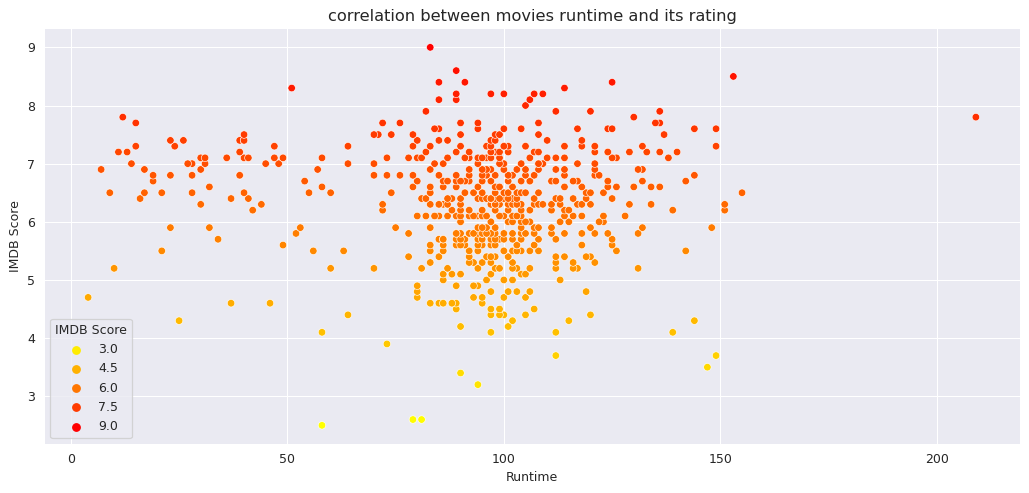

In [117]:
plt.figure(figsize=(14, 6), dpi=90, frameon=True)
sns.scatterplot(data=netflix, x='Runtime', y='IMDB Score', hue='IMDB Score', palette='autumn_r')
plt.title('correlation between movies runtime and its rating', size=13)
plt.show()

# What is the distribution of movies across different languages?

In [24]:
netflix['Primary_Language'].value_counts(ascending=False)

Primary_Language
English       419
Spanish        34
Hindi          33
French         20
Italian        14
Portuguese     12
Indonesian      9
Japanese        6
Korean          6
German          5
Turkish         5
Dutch           3
Polish          3
Marathi         3
Filipino        2
Thai            2
Malay           1
Norwegian       1
Swedish         1
Thia            1
Georgian        1
Bengali         1
Khmer           1
Tamil           1
Name: count, dtype: int64

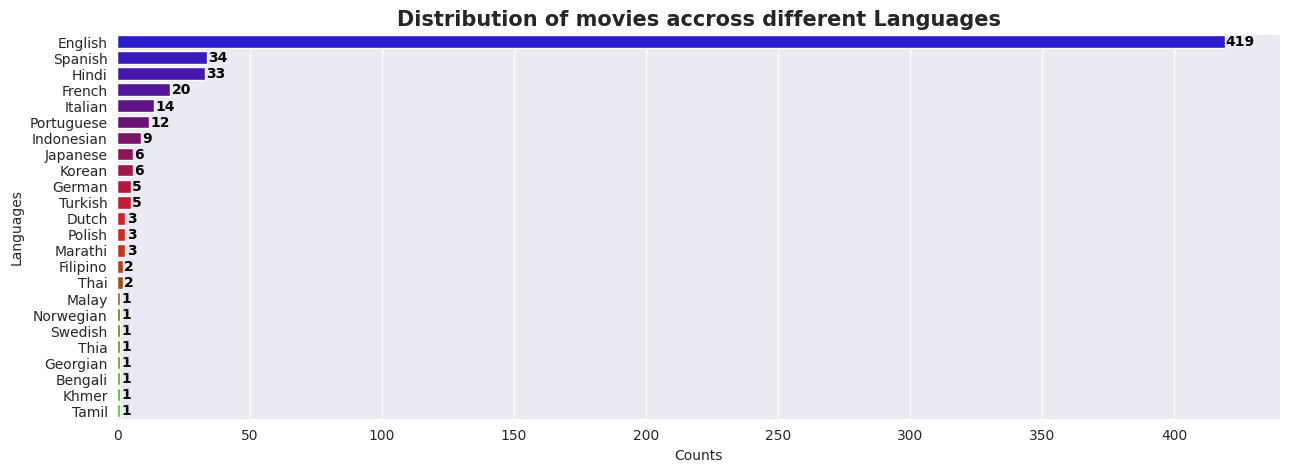

In [95]:
lang = netflix['Primary_Language'].value_counts(ascending=False)
plt.figure(figsize=(15, 5))
sns.barplot(x=lang.values, y=lang.index, palette='brg')
for i, v in enumerate(lang.values):
    plt.text(x=v+0.5, y=i, s=str(v), fontsize=10, color='black', fontweight='bold', va='center')
plt.title('Distribution of movies accross different Languages', fontsize=15, fontweight='bold')
plt.xlabel('Counts')
plt.ylabel('Languages')
plt.show()

# What is the trend in the number of releases over the years?

In [26]:
# This will group the data by year and count the number of titles that were released in each year
netflix['Premiere'] = pd.to_datetime(netflix['Premiere'])
netflix['Year'] = netflix['Premiere'].dt.year
grouped = netflix.groupby('Year')['Title'].count()
print(grouped)

Year
2014      1
2015      9
2016     30
2017     66
2018     99
2019    125
2020    183
2021     71
Name: Title, dtype: int64


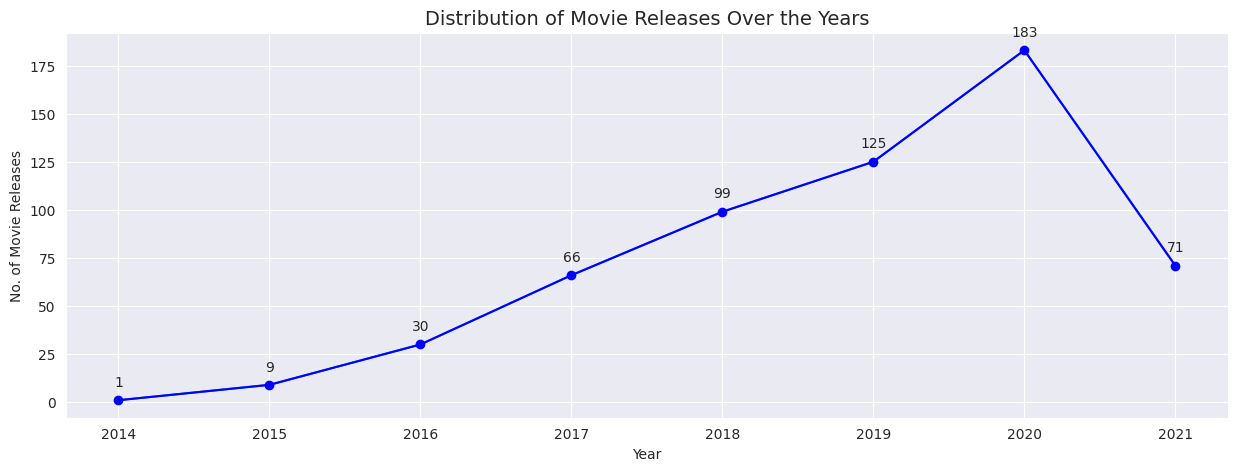

In [27]:
grouped.plot(figsize=(15,5))
plt.plot(grouped.index, grouped.values, color='blue', marker='o')   
plt.ylabel('No. of Movie Releases')
plt.title('Distribution of Movie Releases Over the Years', size=14)

for i, value in enumerate(grouped.values):
    plt.annotate(str(value), (grouped.index[i], value), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

# Which year had the highest average IMDB score?

In [31]:
netflix.groupby('Year')['IMDB Score'].mean().sort_values(ascending=False).round(decimals=1)

Year
2015    6.9
2016    6.5
2017    6.4
2014    6.4
2018    6.4
2019    6.3
2020    6.2
2021    6.0
Name: IMDB Score, dtype: float64

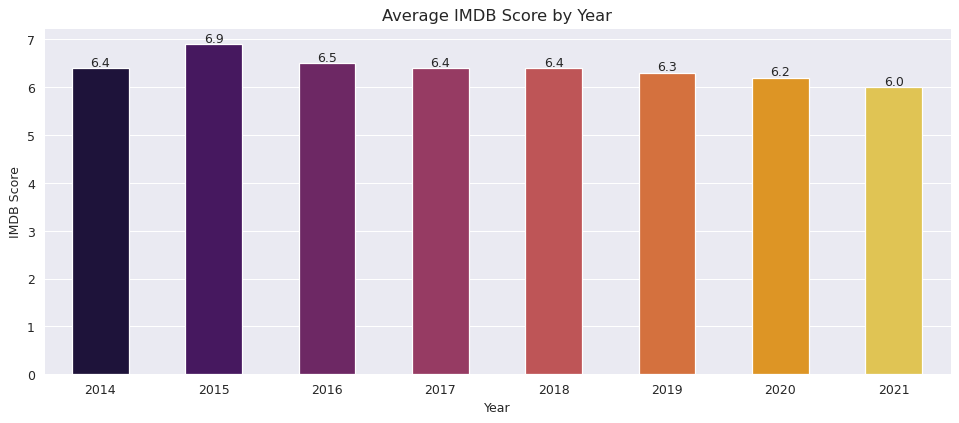

In [97]:
yr = netflix.groupby('Year')['IMDB Score'].mean().round(decimals=1)
plt.figure(figsize=(13, 5), dpi=90)
sns.barplot(x=yr.index, y=yr.values, palette='inferno', width=0.5)
plt.title('Average IMDB Score by Year', size=13)
plt.ylabel('IMDB Score')

for i, v in enumerate(yr.values):
    plt.text(i, v + 0.05, str(v), ha='center')

plt.show()

# Are movies in certain languages rated higher on average?

In [47]:
netflix.groupby('Primary_Language')['IMDB Score'].mean().sort_values(ascending=False).round(decimals=1)

Primary_Language
Khmer         7.2
Tamil         7.2
Bengali       7.1
Georgian      6.8
Thia          6.7
Japanese      6.4
English       6.4
Spanish       6.3
Portuguese    6.2
Marathi       6.1
Hindi         6.0
Korean        5.9
Indonesian    5.8
Dutch         5.8
French        5.8
Turkish       5.7
German        5.6
Italian       5.5
Swedish       5.5
Thai          5.4
Polish        5.2
Norwegian     5.1
Filipino      5.1
Malay         4.2
Name: IMDB Score, dtype: float64

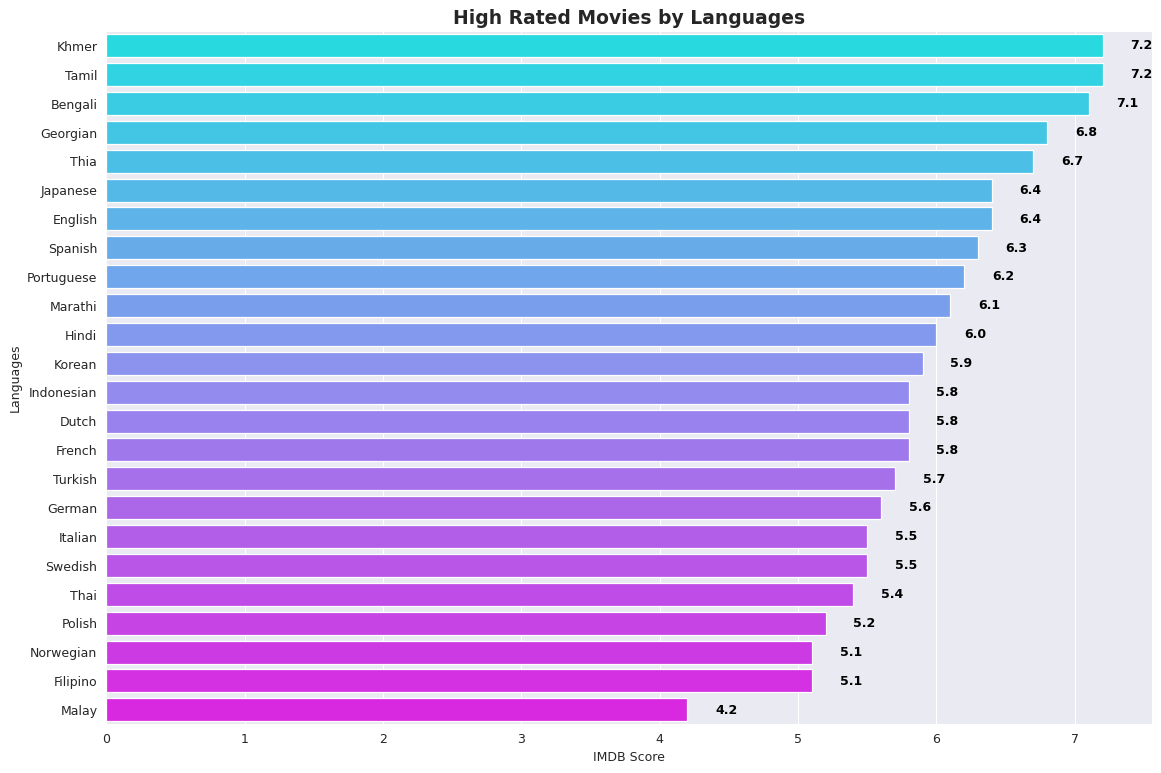

In [63]:
pg_lang = netflix.groupby('Primary_Language')['IMDB Score'].mean().sort_values(ascending=False).round(decimals=1)

plt.figure(figsize=(15, 10),dpi=90, frameon=True)
sns.barplot(x=pg_lang.values, y=pg_lang.index, palette='cool')

plt.title('High Rated Movies by Languages', size=15, fontweight='bold')
plt.ylabel('Languages')
plt.xlabel('IMDB Score')

for i, v in enumerate(pg_lang.values):
    plt.text(x=v+0.2, y=i, s=str(v), fontsize=10, color='black', fontweight='bold', va='center')

plt.show()

# What is the distribution of IMDB scores?

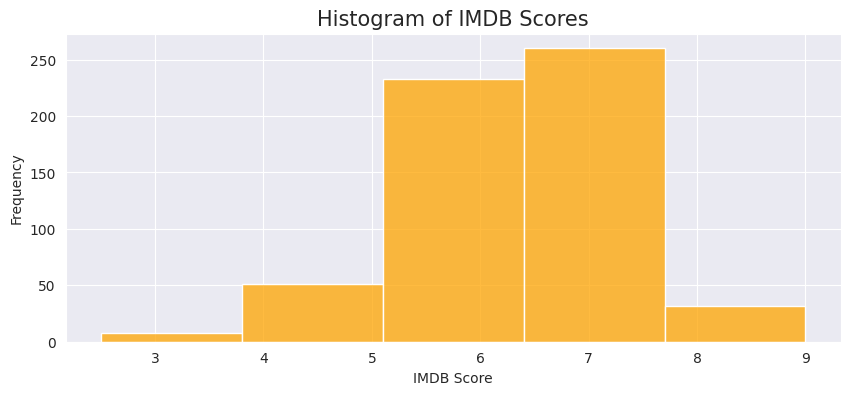

In [78]:
# Plot a histogram for the 'IMDB Score' column
fig, ax = plt.subplots(figsize=(10, 4))
sns.histplot(data=netflix, x='IMDB Score', bins=5, ax=ax, color='Orange')
plt.title('Histogram of IMDB Scores', size=15)
plt.xlabel('IMDB Score')
plt.ylabel('Frequency')
plt.show()

# What is the most common genre on Netflix?

In [72]:
netflix['Primary_Genre'].value_counts().sort_values(ascending=False)

Primary_Genre
Documentary                   159
Drama                          78
Comedy                         51
Romantic comedy                40
Thriller                       33
                             ... 
Hidden-camera prank comedy      1
Comedy mystery                  1
Dance comedy                    1
Adventure-romance               1
Musical                         1
Name: count, Length: 91, dtype: int64

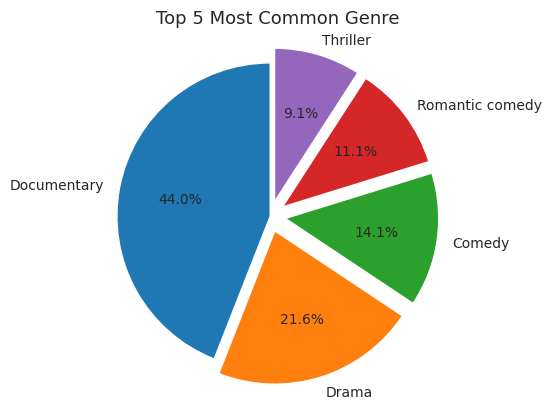

In [76]:
genre = netflix['Primary_Genre'].value_counts().sort_values(ascending=False).head()
plt.pie(genre.values, labels= genre.index, autopct='%1.1f%%', startangle=90, explode=[0, 0.1, 0.1, 0.1, 0.1])
plt.title('Top 5 Most Common Genre', size=13)
plt.axis('equal')
plt.show()

# What is the average runtime of movies released in different months?

In [83]:
netflix['Premiere'] = pd.to_datetime(netflix['Premiere'])
netflix['Month'] = netflix['Premiere'].dt.month
groupedM = netflix.groupby('Month')['Runtime'].mean().round()
print(groupedM)

Month
1      94.0
2      96.0
3      94.0
4      94.0
5      92.0
6     101.0
7      97.0
8      87.0
9      87.0
10     94.0
11     95.0
12     92.0
Name: Runtime, dtype: float64


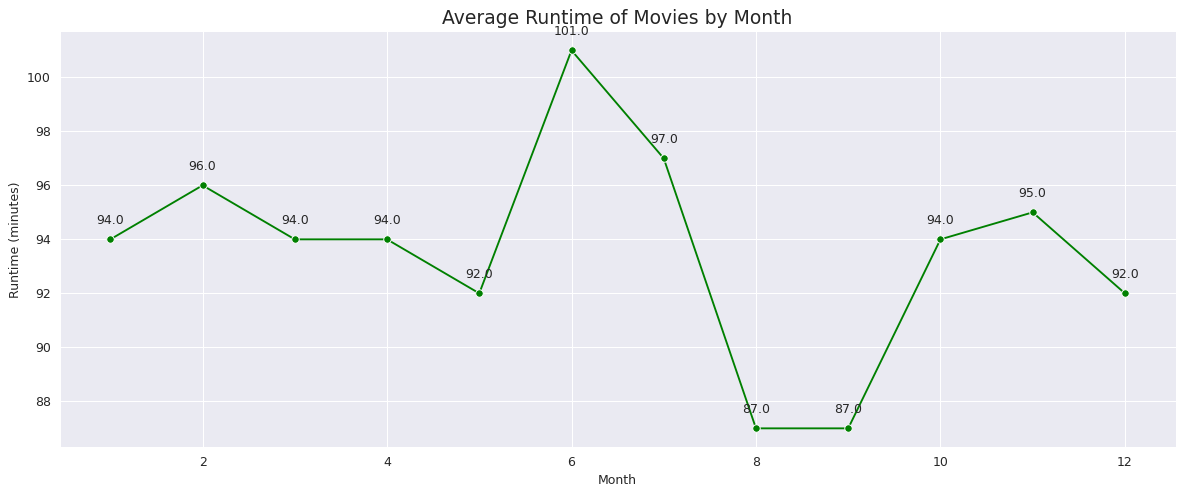

In [93]:
plt.figure(figsize=(16, 6), dpi=90, frameon=True)

sns.lineplot(x=groupedM.index, y=groupedM.values, marker='o', color='green')

plt.title('Average Runtime of Movies by Month', size=15)
plt.ylabel('Runtime (minutes)')

for i, value in enumerate(groupedM.values):
    plt.annotate(str(value), (groupedM.index[i], value), textcoords="offset points", xytext=(0,12), ha='center')


plt.show()

**The analysis of Netflix original movies provides valuable insights into key factors influencing their success. Understanding audience preferences in terms of genres, languages, runtime, and IMDB scores. This data-driven approach contributes to customer satisfaction, retention, and the potential for attracting new subscribers.**